In [2]:
import pandas as pd
from matplotlib import pyplot as plt

In [3]:
data = pd.read_csv('clean_data.csv')
data.head()


,song_name,artist_name,played_at,timestamp
0,I See the Light,Ben E. King,2021-08-28T17:14:33.930Z,2021-08-28
1,Let Me Live in Your Life,Ben E. King,2021-08-28T17:13:55.877Z,2021-08-28
2,Stand by Me,Ben E. King,2021-08-28T17:13:33.302Z,2021-08-28
3,"Stand By Me - DJ ""D.O.C."" Remix",Ben E. King,2021-08-28T17:12:50.194Z,2021-08-28
4,Seven Nation Army,Scott Rill,2021-08-28T17:12:03.221Z,2021-08-28


In [4]:
# barr = data.groupby(['artist_name'])['song_name'].count().sort_values(['song_name'], ascending=False)
barr = data.groupby('artist_name').count().sort_values(['song_name'], ascending=False).head(10)

<AxesSubplot:title={'center':'Most Played Artists'}, xlabel='Artists', ylabel='Number of songs'>

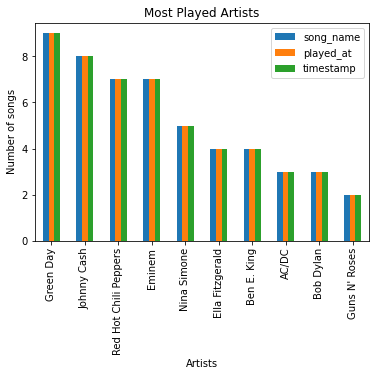

In [5]:
barr.plot(kind='bar', title='Most Played Artists', ylabel='Number of songs',
         xlabel='Artists')

In [50]:
dashFrame = data.groupby(['artist_name'])['song_name'].count().sort_values(ascending=False).head(10)
dashFrame

artist_name
Green Day                9
Johnny Cash              8
Eminem                   7
Red Hot Chili Peppers    7
Nina Simone              5
Ben E. King              4
Ella Fitzgerald          4
AC/DC                    3
Bob Dylan                3
Marwan Pablo             2
Name: song_name, dtype: int64

-------------------------------------------------------------------------
Loading a MongoDB Collection directly here using Pandas and Python Lists
------

In [110]:
from pymongo import MongoClient
import pandas as pd
from bson.json_util import dumps
from bson.json_util import loads
import json

client = MongoClient('mongodb://localhost:27017/')
client.list_database_names()


['admin', 'config', 'local', 'raw_spotify', 'raw_spotify_test']

In [111]:
db = client['raw_spotify']
db.list_collection_names()

['raw_30-08-2021', 'raw_12-09-2021', 'raw_11-09-2021', 'raw', 'raw_29-08-2021']

In [112]:
aug_coll = db["raw_30-08-2021"]

In [113]:
%load_ext memory_profiler

The memory_profiler extension is already loaded. To reload it, use:
  %reload_ext memory_profiler


In [117]:
# %%time
cursor = list(aug_coll.find())

df = pd.DataFrame(cursor)
df= df.drop(['_id', 'next', 'cursors', 'limit', 'href'], axis=1)

df = df.explode('items', ignore_index=True)

df.head()

,items
0,{'track': {'album': {'album_type': 'compilatio...
1,"{'track': {'album': {'album_type': 'album', 'a..."
2,"{'track': {'album': {'album_type': 'album', 'a..."
3,"{'track': {'album': {'album_type': 'album', 'a..."
4,"{'track': {'album': {'album_type': 'album', 'a..."


In [115]:
song_names = []
artist_names = []
played_at_list = []
timestamps = []

for record in df['items']:
    song_names.append(record["track"]["name"])
    artist_names.append(record["track"]["album"]["artists"][0]["name"])
    played_at_list.append(record["played_at"])
    timestamps.append(record["played_at"][0:10])
    
print(song_names)
print("---------")
print(artist_names)
print("---------")
print(played_at_list)
print("---------")
print(timestamps)

['Still Loving You', 'Come and See Me (feat. Drake)', 'I Wish I Knew How It Would Feel to Be Free', 'Baltimore', 'I Put A Spell On You', 'My Baby Just Cares for Me - 2013 Remastered Version', 'Feeling Good', 'Dark Necessities', 'Give It Away', 'By the Way', 'Dani California', 'Scar Tissue', 'Otherside', 'Sindbad', 'Atary (Full Version)', 'شيراتون', 'واحد وعشرين', 'Msh Fair', 'Tesla', 'Mkahrab']
---------
['Scorpions', 'PARTYNEXTDOOR', 'Nina Simone', 'Nina Simone', 'Nina Simone', 'Nina Simone', 'Nina Simone', 'Red Hot Chili Peppers', 'Red Hot Chili Peppers', 'Red Hot Chili Peppers', 'Red Hot Chili Peppers', 'Red Hot Chili Peppers', 'Red Hot Chili Peppers', 'Marwan Pablo', 'Marwan Pablo', 'Marwan Moussa', 'Wegz', 'Wegz', 'Marwan Moussa', 'Marwan Moussa']
---------
['2021-08-30T21:38:09.495Z', '2021-08-30T21:36:31.353Z', '2021-08-30T21:31:27.995Z', '2021-08-30T21:28:19.076Z', '2021-08-30T21:23:37.150Z', '2021-08-30T21:23:35.926Z', '2021-08-30T21:22:24.995Z', '2021-08-30T21:17:19.953Z', '2

In [102]:
song_dict = {
    "song_name" : song_names,
    "artist_name": artist_names,
    "played_at" : played_at_list,
    "timestamp" : timestamps
}
song_df = pd.DataFrame(song_dict, columns = ["song_name", "artist_name", "played_at", "timestamp"])
song_df

,song_name,artist_name,played_at,timestamp
0,Still Loving You,Scorpions,2021-08-30T21:38:09.495Z,2021-08-30
1,Come and See Me (feat. Drake),PARTYNEXTDOOR,2021-08-30T21:36:31.353Z,2021-08-30
2,I Wish I Knew How It Would Feel to Be Free,Nina Simone,2021-08-30T21:31:27.995Z,2021-08-30
3,Baltimore,Nina Simone,2021-08-30T21:28:19.076Z,2021-08-30
4,I Put A Spell On You,Nina Simone,2021-08-30T21:23:37.150Z,2021-08-30
5,My Baby Just Cares for Me - 2013 Remastered Ve...,Nina Simone,2021-08-30T21:23:35.926Z,2021-08-30
6,Feeling Good,Nina Simone,2021-08-30T21:22:24.995Z,2021-08-30
7,Dark Necessities,Red Hot Chili Peppers,2021-08-30T21:17:19.953Z,2021-08-30
8,Give It Away,Red Hot Chili Peppers,2021-08-30T21:17:10.387Z,2021-08-30
9,By the Way,Red Hot Chili Peppers,2021-08-30T21:16:59.113Z,2021-08-30
